In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
from kerasy.datasets import mnist
from kerasy.ML.decomposition import tSNE

In [4]:
seed = 0
Nimg_per_cls = 250

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
n_train, _, _ = x_train.shape
n_test,  _, _ = x_test.shape

In [7]:
x_train = x_train.reshape(n_train, -1)

In [8]:
# Chose Nimg_per_cls images for each class. 
idxes = np.concatenate([np.random.RandomState(seed).choice(np.where(y_train==cls)[0], Nimg_per_cls) for cls in np.unique(y_train)])

In [9]:
# Selected images and labels.
X = x_train[idxes]
Y = y_train[idxes]

In [10]:
N, D = X.shape
print(f"Num of data    : {N}")
print(f"Num of features: {D}")

Num of data    : 2500
Num of features: 784


In [11]:
model = tSNE()

In [12]:
X_transformed = model.fit_transform(X, n_components=2, initial_dims=50, perplexity=30.0, random_state=seed)

Preprocessing the data using PCA to reduce the dimentions 784→50
Each conditional Gaussian has the same perplexity: 30.0
Mean value of sigma: 0.001
01/10 : [#####################] 100.00% KL(P||Q) = 16.972
02/10 : [#####################] 100.00% KL(P||Q) = 1.514
03/10 : [#####################] 100.00% KL(P||Q) = 1.314
04/10 : [#####################] 100.00% KL(P||Q) = 1.234
05/10 : [#####################] 100.00% KL(P||Q) = 1.190
06/10 : [#####################] 100.00% KL(P||Q) = 1.163
07/10 : [#####################] 100.00% KL(P||Q) = 1.145
08/10 : [#####################] 100.00% KL(P||Q) = 1.131
09/10 : [#####################] 100.00% KL(P||Q) = 1.121
10/10 : [#####################] 100.00% KL(P||Q) = 1.114


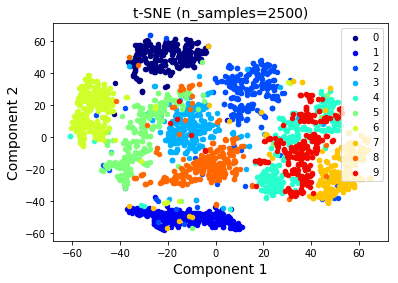

In [14]:
for cls in np.unique(Y):
    idx = cls==Y
    plt.scatter(X_transformed[idx,0], X_transformed[idx,1], color=cm.jet(cls/10), s=20, label=cls)
plt.legend(), plt.xlabel("Component 1", fontsize=14), plt.ylabel("Component 2", fontsize=14), plt.title(f"t-SNE (n_samples={N})", fontsize=14)
plt.show()